## EDA AND TRAINING DATA PREPROCESSING

In [1]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Reading the data
train = pd.read_csv('../input/AutismPrediction/train.csv')
test = pd.read_csv('../input/AutismPrediction/test.csv')

In [3]:
## Checking the head of the data
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [4]:
## Checking the column names in the dataframe
train.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [5]:
## Finding the numerical and categorical columns
cat_cols = [feature for feature in train.columns if train[feature].dtypes == 'O']
num_cols = [feature for feature in train.columns if feature not in cat_cols]

In [6]:
## Printing the numerical and categorical columns
print(f"Numerical columns: {num_cols}\n")
print(f"Categorical columns: {cat_cols}")

Numerical columns: ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']

Categorical columns: ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']


In [7]:
## Finding the unique values in each of the categorical feature columns
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {train[feature].nunique()}")
    print(f"Unique values: {train[feature].unique()}")
    print('\n')

gender:
Number of unique values in the gender: 2
Unique values: ['f' 'm']


ethnicity:
Number of unique values in the ethnicity: 12
Unique values: ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']


jaundice:
Number of unique values in the jaundice: 2
Unique values: ['no' 'yes']


austim:
Number of unique values in the austim: 2
Unique values: ['no' 'yes']


contry_of_res:
Number of unique values in the contry_of_res: 56
Unique values: ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan'

In [8]:
## Removing unnecessary columns
## Removing ID column since it doesn't provide any logical relation to the occurance of the disease
## Removing the age_desc column since it has only one value. In other words, the column has zero variance
train.drop(columns=['ID','age_desc'],axis=1,inplace=True)

In [9]:
## Checking the successful dropping of ID and age_desc columns
train.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [10]:
## Some of the columns have ? symbol instead of the record
## Here we will just add such records into the Others category
## Columns -- ethnicity, relation
train['ethnicity'] = np.where(train['ethnicity'] == '?', 'Others',train['ethnicity'])
train['relation'] = np.where(train['relation'] == '?', 'Others', train['relation'])

In [11]:
## Checking for successful replacement of records with ?
for feature in ['ethnicity','relation']:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {train[feature].nunique()}")
    print(f"Unique values: {train[feature].unique()}")
    print('\n')

ethnicity:
Number of unique values in the ethnicity: 11
Unique values: ['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']


relation:
Number of unique values in the relation: 5
Unique values: ['Self' 'Relative' 'Parent' 'Others' 'Health care professional']




In [12]:
## In the feature column ethnicity, there are two types of other columns : 1. Others 2. others
## Let's just merge those records into one category named Others
train['ethnicity']= np.where(train['ethnicity'] == 'others', 'Others', train['ethnicity'])

In [13]:
for feature in ['ethnicity']:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {train[feature].nunique()}")
    print(f"Unique values: {train[feature].unique()}")
    print('\n')

ethnicity:
Number of unique values in the ethnicity: 10
Unique values: ['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino']




In [14]:
num_cols.remove('ID')
cat_cols.remove('age_desc')

In [15]:
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {train[feature].nunique()}")
    print(f"Unique values: {train[feature].unique()}")
    print('\n')

gender:
Number of unique values in the gender: 2
Unique values: ['f' 'm']


ethnicity:
Number of unique values in the ethnicity: 10
Unique values: ['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino']


jaundice:
Number of unique values in the jaundice: 2
Unique values: ['no' 'yes']


austim:
Number of unique values in the austim: 2
Unique values: ['no' 'yes']


contry_of_res:
Number of unique values in the contry_of_res: 56
Unique values: ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Arge

In [16]:
## Checking for missing values in the dataset
train.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
relation           0
Class/ASD          0
dtype: int64

**It seems there are no missing values in the dataset**

In [17]:
## Checking whether the data is unbalanced or not
train['Class/ASD'].value_counts()

0    639
1    161
Name: Class/ASD, dtype: int64

In [18]:
639/(161+639)

0.79875

This means that almost 80% of the target values are of single category.

**The dataset seems to be unbalanced**

In [19]:
cat_cols

['gender',
 'ethnicity',
 'jaundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'relation']

In [20]:
## Since we already have over 15 independent feature, we will use ordinal encoding instead of the one-hot encoding on the
## categorical features
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=60, dtype=np.int64)

train[cat_cols] = oe.fit_transform(train[cat_cols])

In [21]:
train[cat_cols].head()

,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,relation
0,0,5,0,0,7,0,4
1,1,5,0,0,25,0,4
2,1,9,0,1,54,0,4
3,0,5,0,0,54,0,4
4,1,5,0,0,46,0,4


In [22]:
for feature in cat_cols:
    print(f"Unique values in {feature}:")
    print(f"{train[feature].unique()}\n")

Unique values in gender:
[0 1]

Unique values in ethnicity:
[5 9 4 6 1 2 0 8 7 3]

Unique values in jaundice:
[0 1]

Unique values in austim:
[0 1]

Unique values in contry_of_res:
[ 7 25 54 46 31 53 13 36 15 32 52  6 51 27 21 33 55 19 35  0 39 29  1  9
 43 28  5 48 42 12  8  4 44 20 49 24 23  2 16 22 47 50 40 26  3 30 34 37
 45 18 38 41 17 11 14 10]

Unique values in used_app_before:
[0 1]

Unique values in relation:
[4 3 2 1 0]



<AxesSubplot:>

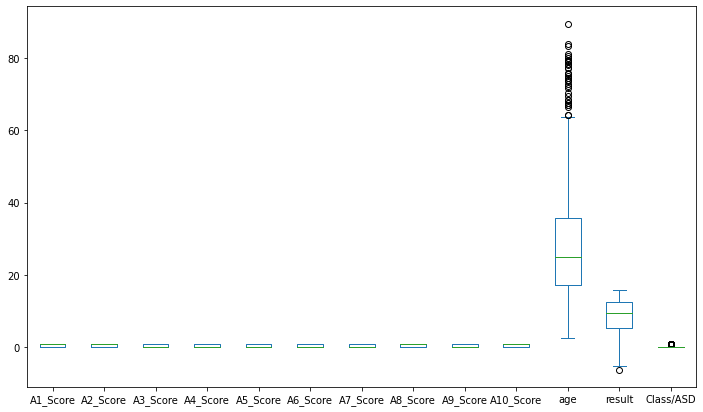

In [23]:
## Checking for outliers in the numerical features
train[num_cols].plot(kind='box', figsize=(12,7))

<AxesSubplot:ylabel='Density'>

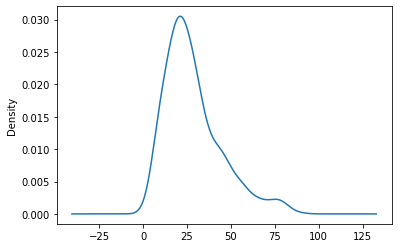

In [24]:
## plotting important numerical feature
train['age'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

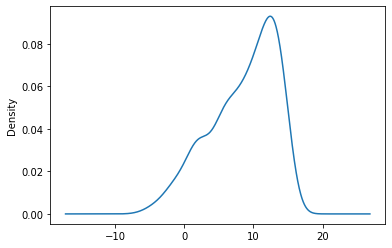

In [25]:
train['result'].plot(kind='kde')

**Two columns seems to be almost normal so we will keep them as they are**

In [26]:
## Our training data is ready 
train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,5,0,0,7,0,6.351166,4,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,5,0,0,25,0,2.255185,4,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,9,0,1,54,0,14.851484,4,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,5,0,0,54,0,2.276617,4,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,5,0,0,46,0,-4.777286,4,0


## Model Training

In [27]:
## Splitting the train data into X_train and y_train
X_train = train.drop('Class/ASD', axis=1)
y_train = train['Class/ASD']

In [28]:
## Importing different model classes from the scikit-learn library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

In [29]:
## Importing a method for finding the cross validation score on the training data
from sklearn.model_selection import cross_val_score

In [30]:
## Creating a object for the models
lr = LogisticRegression(random_state=234, max_iter=3000)
svc = SVC(random_state=567,probability=True)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(max_depth=3, n_jobs=-1)
adab = AdaBoostClassifier(n_estimators=100, random_state=32389)
gradb = GradientBoostingClassifier(random_state=34990)
pre=precision_score

In [31]:
## Finding the cross validation score for every object that was created
model_lst = [lr, svc, knc, rfc, adab, gradb]

for model in model_lst:
    cvs = cross_val_score(model, X_train, y_train, cv=10, scoring = 'roc_auc', n_jobs=-1).mean()
    print(f"Cross validation score for the {model}: {np.round(cvs,3)}\n")
print("-----------------------------------------------------------------------------------------------------------------")
model_lst = [lr, svc, knc, rfc, adab, gradb]

for model in model_lst:
    cvs = cross_val_score(model, X_train, y_train, cv=7, scoring = 'roc_auc', n_jobs=-1).mean()
    print(f"Cross validation score for the {model}: {np.round(cvs,3)}\n")
print("-----------------------------------------------------------------------------------------------------------------")
model_lst = [lr, svc, knc, rfc, adab, gradb]

for model in model_lst:
    cvs = cross_val_score(model, X_train, y_train, cv=5, scoring = 'roc_auc', n_jobs=-1).mean()
    print(f"Cross validation score for the {model}: {np.round(cvs,3)}\n")
print("-----------------------------------------------------------------------------------------------------------------")
model_lst = [lr, svc, knc, rfc, adab, gradb]

for model in model_lst:
    cvs = cross_val_score(model, X_train, y_train, cv=3, scoring = 'roc_auc', n_jobs=-1).mean()
    print(f"Cross validation score for the {model}: {np.round(cvs,3)}\n")

print("-----------------------------------------------------------------------------------------------------------------")
accuracy_scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
print(f"دقة نموذج Random Forest: {np.round(accuracy_scores.mean(), 3)}")

f1_scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring='f1', n_jobs=-1)
print(f"F1 Score لنموذج Random Forest: {np.round(f1_scores.mean(), 3)}")
print("-----------------------------------------------------------------------------------------------------------------")
for model in model_lst:
    cvs_recall = cross_val_score(model, X_train, y_train, cv=10, scoring='recall', n_jobs=-1).mean()
    print(f"Cross validation Recall score for {model}: {np.round(cvs_recall, 3)}\n")
print("-----------------------------------------------------------------------------------------------------------------")
for model in model_lst:
    cvs_precision = cross_val_score(model, X_train, y_train, cv=10, scoring='precision', n_jobs=-1).mean()
    print(f"Cross validation Precision score for {model}: {np.round(cvs_precision, 3)}\n")

print("-----------------------------------------------------------------------------------------------------------------")

Cross validation score for the LogisticRegression(max_iter=3000, random_state=234): 0.905

Cross validation score for the SVC(probability=True, random_state=567): 0.868

Cross validation score for the KNeighborsClassifier(): 0.811

Cross validation score for the RandomForestClassifier(max_depth=3, n_jobs=-1): 0.916

Cross validation score for the AdaBoostClassifier(n_estimators=100, random_state=32389): 0.876

Cross validation score for the GradientBoostingClassifier(random_state=34990): 0.896

-----------------------------------------------------------------------------------------------------------------
Cross validation score for the LogisticRegression(max_iter=3000, random_state=234): 0.907

Cross validation score for the SVC(probability=True, random_state=567): 0.866

Cross validation score for the KNeighborsClassifier(): 0.816

Cross validation score for the RandomForestClassifier(max_depth=3, n_jobs=-1): 0.914

Cross validation score for the AdaBoostClassifier(n_estimators=100, 

In [32]:
from sklearn.metrics import roc_auc_score ,precision_score, recall_score, f1_score
import random

vc = VotingClassifier(estimators=
                     [('lr',lr), ('svc', svc), ('rfc', rfc), ('knc', knc)], voting='soft')
vc.fit(X_train, y_train)
vc_scores = vc.predict_proba(X_train)[:,1]
vc_roc_auc_score = np.round(roc_auc_score(y_train, vc_scores),3)
print(f"Cross validation score for the voting classifier: {vc_roc_auc_score}")

Cross validation score for the voting classifier: 0.938


In [33]:
## Trying out another voting classifier
vc2 = VotingClassifier(estimators=
                     [('lr',lr),('rfc', rfc), ('adab',adab), ('gradb', gradb)], voting='soft')
vc2.fit(X_train, y_train)
vc2_scores = vc2.predict_proba(X_train)[:,1]
vc2_roc_auc_score = np.round(roc_auc_score(y_train, vc2_scores),3)
print(f"Cross validation score for the voting classifier: {vc2_roc_auc_score}")

Cross validation score for the voting classifier: 0.965


In [34]:
## Trying out the stacking classifier
estimators = [('vc',vc), ('vc2', vc2)]

sc = StackingClassifier(estimators=estimators, final_estimator=rfc)
sc.fit(X_train, y_train)
sc_score = sc.predict_proba(X_train)[:,1]
sc_roc_auc_score = np.round(roc_auc_score(y_train, sc_score), 3)
print(f"Cross validation score for the stacking classifier: {sc_roc_auc_score}")

Cross validation score for the stacking classifier: 0.952


In [35]:
test_predictions = vc2.predict(test.drop('re', axis=1))

true_values = test['re']  

recall = recall_score(true_values, test_predictions, average='binary') 

KeyError: "['re'] not found in axis"

**Voting classifier number 2 seems to be the best model out of all the ones that we trained on the training data**

### PREPROCESSING THE TEST DATA

In [ ]:
test.head()

In [ ]:
## Finding the numerical and categorical columns
cat_cols_test = [feature for feature in test.columns if test[feature].dtypes == 'O']
num_cols_test = [feature for feature in test.columns if feature not in cat_cols_test]

In [ ]:
print(f"Numerical columns: {num_cols_test}\n")
print(f"Categorical columns: {cat_cols_test}")

In [ ]:
## Finding the unique values in each of the categorical feature columns
for feature in cat_cols_test:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {test[feature].nunique()}")
    print(f"Unique values: {test[feature].unique()}")
    print('\n')

In [ ]:
## Some of the columns present in the dataset have a ? instead of a record
## Columns -- ethnicity and relation
test['ethnicity'] = np.where(test['ethnicity'] == '?', 'Others', test['ethnicity'])
test['relation'] = np.where(test['relation'] == '?', 'Others', test['relation'])

In [ ]:
for feature in cat_cols_test:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {test[feature].nunique()}")
    print(f"Unique values: {test[feature].unique()}")
    print('\n')

In [ ]:
## Checking for the missing values in the dataset
test.isnull().sum()

**No missing values in the test data also**

In [ ]:
## Removing useless columns from the dataset
## Removing ID column since it doesn't contribute to the prediction of the autism as we can tell by our logic
## Removing the age_desc columns since the column has only one value. In other words, the column has zero variance
test.drop(['ID','age_desc'],axis=1,inplace=True)

In [ ]:
test.columns

In [ ]:
num_cols_test.remove('ID')

In [ ]:
cat_cols_test.remove('age_desc')

In [ ]:
print(f"Numerical columns: {num_cols_test}\n")
print(f"Categorical columns: {cat_cols_test}")

In [ ]:
## Encoding the categorical columns
test[cat_cols_test] = oe.transform(test[cat_cols_test])

In [ ]:
for feature in cat_cols_test:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {test[feature].nunique()}")
    print(f"Unique values: {test[feature].unique()}")
    print('\n')

### Making predictions for the test data using the trained voting classifier number 2

In [ ]:
final_predictions = vc2.predict(test)

In [ ]:
final_predictions

In [ ]:
len(final_predictions)